# <span style="color:#0F19C9">Contenido</span>

- [Importar librerías y datos](#importar-librerías-y-datos)
- [Entendiendo los datos](#entendiendo-los-datos)
- [Análisis univariable](#análisis-univariable)
    - [Distribución de artistas](#distribución-de-artistas)
    - [Cantidad de seguidores](#cantidad-de-seguidores)
    - [Tipo de contenido](#tipo-de-contenido)
    - [Fecha y Hora de publicación](#fecha-y-hora-de-publicación)
    - [Distribución de KPI](#distribución-de-kpi)
    - [Distribución de likes](#distribución-de-likes)
    - [Distribución de comentarios](#distribución-de-comentarios)
    - [Distribución de palabras del Caption](#distribución-de-palabras-del-caption)
    - [Distribución de número de Hashtags](#distribución-de-número-de-hashtags)
    - [Distribución de hashtags](#distribución-de-hashtags)
- [Análisis multivariable](#análisis-multivariable)

# <span style="color:#0F19C9">Importar librerías y datos</span>

Comenzamos el ejercicio de análisis importando las librerías que usaremos para nuestro análisis, en nuestro caso serán:
- Pandas y Numpy para la manipulación de dataframes
- Matplotlib para las visualizaciones

In [124]:
# Importar librerías de manipulación de dataframes
import pandas as pd
import numpy as np
from collections import Counter

# Importar librería de visualización
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [125]:
# Importar mi paleta de colores
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Configurar la fuente de los gráficos
plt.rc('font', family='Georgia', size=12)

In [126]:
# Importar archivos csv
norteno = pd.read_csv('../Data/Norteno.csv')
popular = pd.read_csv('../Data/Popular.csv')
mexico = pd.read_csv('../Data/Mexico.csv')
viral = pd.read_csv('../Data/Outliers.csv')

In [127]:
# Arreglar el formato de fecha de los dataframes
norteno['Fecha y Hora'] = pd.to_datetime(norteno['Fecha y Hora'])
popular['Fecha y Hora'] = pd.to_datetime(popular['Fecha y Hora'])
mexico['Fecha y Hora'] = pd.to_datetime(mexico['Fecha y Hora'])
viral['Fecha y Hora'] = pd.to_datetime(viral['Fecha y Hora'])

C:\Users\juanp\AppData\Local\Temp\ipykernel_10200\3481923058.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  viral['Fecha y Hora'] = pd.to_datetime(viral['Fecha y Hora'])


# <span style="color:#0F19C9">Entendiendo los datos</span>

Vamos a determinar algunos valores generales de nuestro conjunto de datos para verificar si es necesaria alguna corrección que pueda facilitar el análisis.

In [128]:
# Mostrar valores generales
print(f'''Nuestro primer dataframe llamado Norteño, tiene {norteno.shape[0]} filas y {norteno.shape[1]} columnas,
      tiene {norteno.isna().sum().sum()} registros nulos y {norteno.duplicated().sum()} registros duplicados.
      Nuestro segundo dataframe llamado Popular, tiene {popular.shape[0]} filas y {popular.shape[1]} columnas,
      tiene {popular.isna().sum().sum()} registros nulos y {popular.duplicated().sum()} registros duplicados.
      Nuestro tercer dataframe llamado México, tiene {mexico.shape[0]} filas y {mexico.shape[1]} columnas,
      tiene {mexico.isna().sum().sum()} registros nulos y {mexico.duplicated().sum()} registros duplicados.
      Nuestro cuarto dataframe llamado Viral, tiene {viral.shape[0]} filas y {viral.shape[1]} columnas,
      tiene {viral.isna().sum().sum()} registros nulos y {viral.duplicated().sum()} registros duplicados.
      ''')

Nuestro primer dataframe llamado Norteño, tiene 72 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      Nuestro segundo dataframe llamado Popular, tiene 69 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      Nuestro tercer dataframe llamado México, tiene 73 filas y 11 columnas,
      tiene 1 registros nulos y 0 registros duplicados.
      Nuestro cuarto dataframe llamado Viral, tiene 26 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      


In [129]:
# Encontrar el valor nulo del dataframe México
mexico[mexico['Caption'].isna()]

,Artista,Seguidores,Tipo,Fecha y Hora,KPI,Likes,Comentarios,Caption,Palabras en Caption,Número de hashtags,Hashtags
68,Bobby Pulido,162000,Reel,2024-07-27 19:33:21-06:00,0.01392,2255,76,NaN,0,0,[]


In [130]:
# Eliminar la publicación sin caption
mexico = mexico[~mexico['Caption'].isna()].shape

In [131]:
# Imprimir las columnas
print(f'Las columnas de los dataframes son {list(norteno.columns)}')

Las columnas de los dataframes son ['Artista', 'Seguidores', 'Tipo', 'Fecha y Hora', 'KPI', 'Likes', 'Comentarios', 'Caption', 'Palabras en Caption', 'Número de hashtags', 'Hashtags']


Todos los conjuntos de datos comparten las mismas 11 columnas. Nuestro dataframe principal, llamado Norteño, tiene 71 registros, y será el insumo principal para nuestro análisis. Lo soportaremos sobre dos dataframes adicionales llamados Popular y México, cada uno con 70 publicaciones de Instagram y sus respectivas 11 columnas.

# <span style="color:#0F19C9">Análisis Univariable</span>

Vamos a comenzar analizando cada una de las columnas de nuestro dataframe principal: Norteño

In [132]:
# Mostrar 3 registros aleatorios del dataframe
norteno.sample(3)

,Artista,Seguidores,Tipo,Fecha y Hora,KPI,Likes,Comentarios,Caption,Palabras en Caption,Número de hashtags,Hashtags
13,Los Hermanos Ariza Show,23100,Reel,2024-08-20 10:47:34-05:00,0.008528,197,6,¡Gracias familia! Por acompañarnos en cada can...,47,0,[]
54,Los 5 del Norte,16000,Reel,2024-09-13 15:08:06-05:00,0.001813,29,0,🔥 Seguimos MAS FUERTES QUE NUNCA 🎶🤠\n\n#Los5de...,12,5,"['#Los5delNorte', '#musicanorten', '#MasFuerte..."
31,Uriel Henao,50400,Reel,2024-07-11 19:37:51-05:00,0.009286,468,35,"Mis amigos les mando un saludo muy especial, q...",41,0,[]


## <span style="color:#0F19C9">Distribución de artistas</span>

In [133]:
# Encontrar la cantidad de registros por artista
rows_by_artist = norteno['Artista'].value_counts()

In [134]:
rows_by_artist

Artista
Uriel Henao                20
Los 5 del Norte            20
Grupo Dominio              18
Los Hermanos Ariza Show    14
Name: count, dtype: int64

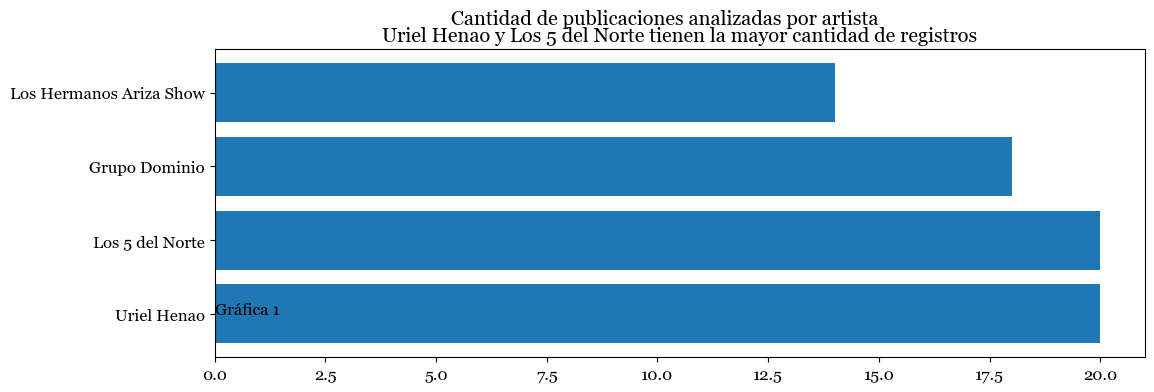

In [135]:
# Graficar la cantidad de registros por artista
plt.figure(figsize=[12, 4])
plt.text(x=0, y=0,
         s='Gráfica 1')
plt.title('Uriel Henao y Los 5 del Norte tienen la mayor cantidad de registros')
plt.suptitle('Cantidad de publicaciones analizadas por artista')
plt.barh(y=rows_by_artist.index,
         width=rows_by_artist)
plt.show()

Aquí es importante mencionar que la información descargada directamente de Instagram contenía 20 publicaciones por artista, pero que se han eliminado algunas que, basado en el KPI de performance, representaban valores atípicos ya que la cantidad de likes, con respecto a la cantidad de seguidores, es demasiado alta. Estos registros los analizaremos a profundidad más adelante.

## <span style="color:#0F19C9">Cantidad de seguidores</span>

In [136]:
# Crear listado de seguidores por artista
followers = norteno.groupby('Artista')['Seguidores'].max().sort_values()

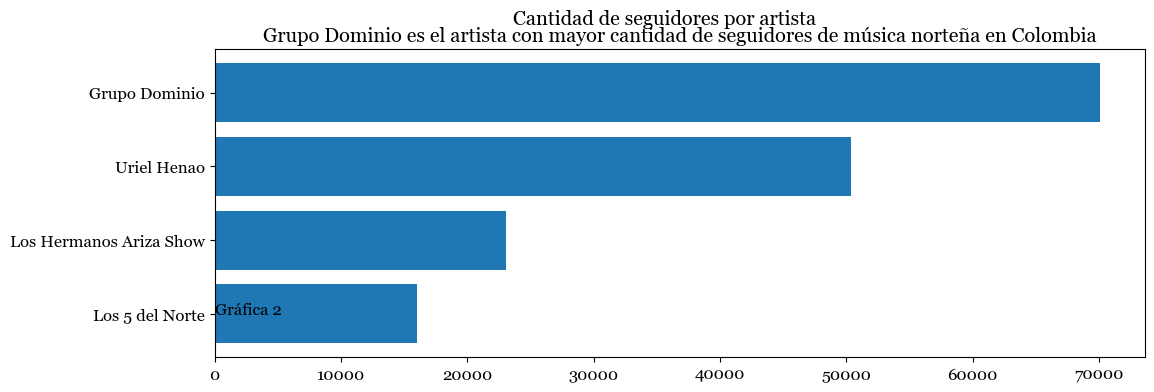

In [137]:
# Graficar la cantidad de seguidores por artista
plt.figure(figsize=[12, 4])
plt.text(x=0, y=0,
         s='Gráfica 2')
plt.title('Grupo Dominio es el artista con mayor cantidad de seguidores de música norteña en Colombia')
plt.suptitle('Cantidad de seguidores por artista')
plt.barh(y=followers.index,
         width=followers)
plt.show()

## <span style="color:#0F19C9">Tipo de contenido</span>

In [138]:
# Contar tipo de contenido por artista
type_of_content = norteno.pivot_table(index='Artista',
                                      columns='Tipo',
                                      values='Fecha y Hora',
                                      aggfunc='count',
                                      fill_value=0)

# Normalizar los datos para que sumen 100 por cada artista
type_of_content = type_of_content.div(
    type_of_content.sum(axis=1), axis=0) * 100

type_of_content

Tipo,Carrusel,Foto,Reel
Artista,,,
Grupo Dominio,55.555556,0.0,44.444444
Los 5 del Norte,0.000000,15.0,85.000000
Los Hermanos Ariza Show,7.142857,0.0,92.857143
Uriel Henao,5.000000,15.0,80.000000


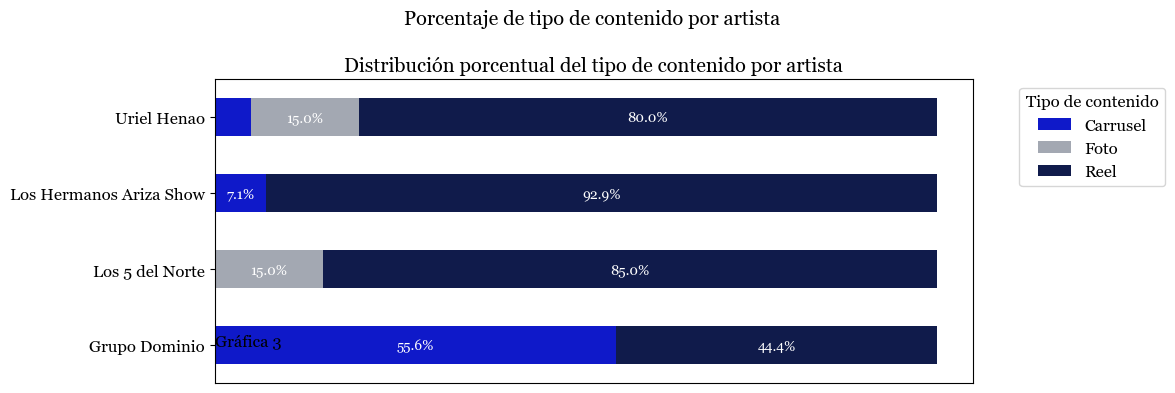

In [139]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=0, y=0,
         s='Gráfica 3')
plt.title('El tipo de contenido principal es el video')
plt.suptitle('Porcentaje de tipo de contenido por artista')
ax.set_title('Distribución porcentual del tipo de contenido por artista')
type_of_content.plot(kind='barh', stacked=True,
                     ax=ax, color=[juan_colors[4],
                                   juan_colors[2],
                                   juan_colors[0]])
ax.legend(title='Tipo de contenido',
          bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel('')
ax.set_xticks([])

for i in range(type_of_content.shape[0]):
    cumulative_sum = 0
    for j, tipo in enumerate(type_of_content.columns):
        value = type_of_content.iloc[i, j]
        if value > 5:
            ax.text(x=cumulative_sum + value / 2, y=i,
                    s=f'{value:.1f}%', ha='center', va='center',
                    color='white', fontsize=10)
        cumulative_sum += value

# Ajustar el layout
plt.tight_layout()
plt.show()

## <span style="color:#0F19C9">Fecha y Hora de publicación</span>

In [140]:
# Imprimir el rango de fechas
print(
    f"Las publicaciones son desde {norteno['Fecha y Hora'].min()} hasta el {norteno['Fecha y Hora'].max()}")

Las publicaciones son desde 2024-05-17 11:18:47-05:00 hasta el 2024-09-17 16:16:39-05:00


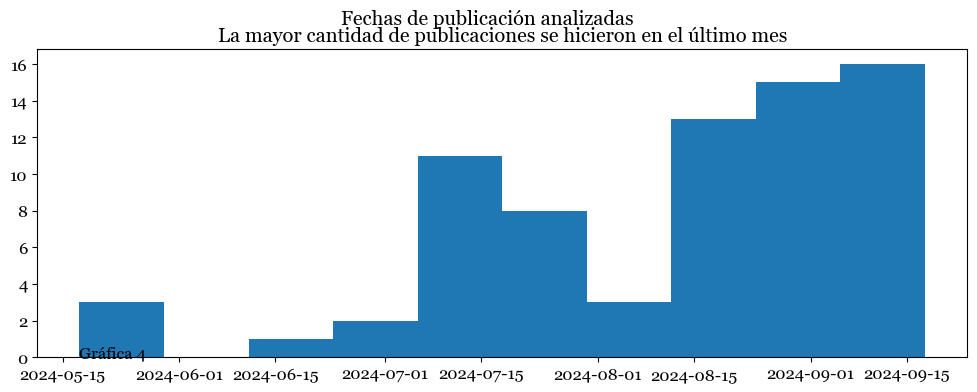

In [141]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=norteno['Fecha y Hora'].min(), y=0,
         s='Gráfica 4')
plt.title('La mayor cantidad de publicaciones se hicieron en el último mes')
plt.suptitle('Fechas de publicación analizadas')
plt.hist(norteno['Fecha y Hora'])
plt.show()

## <span style="color:#0F19C9">Distribución de KPI</span>

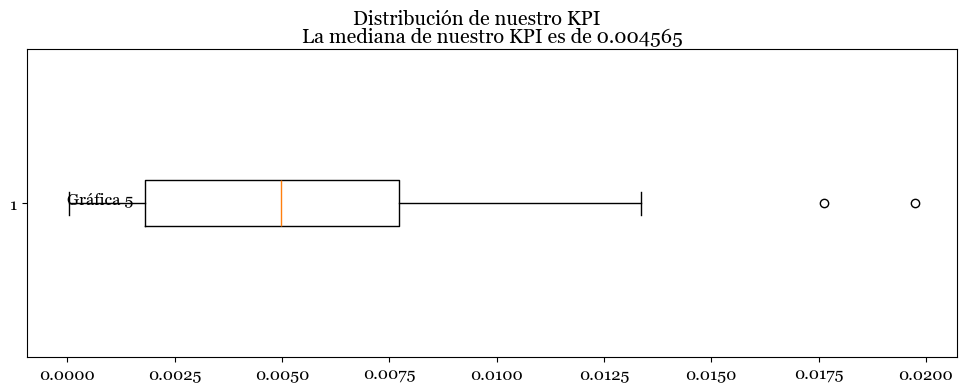

count    72.000000
mean      0.005361
std       0.004173
min       0.000043
25%       0.001813
50%       0.004974
75%       0.007724
max       0.019740
Name: KPI, dtype: float64

In [142]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=0, y=1,
         s='Gráfica 5')
plt.title('La mediana de nuestro KPI es de 0.004565')
plt.suptitle('Distribución de nuestro KPI')
plt.boxplot(norteno['KPI'], vert=False)
plt.show()

norteno['KPI'].describe()

In [143]:
# Encontrar mediana de likes por cuenta
mediana_de_likes = {}
mediana_de_likes['Los Hermanos Ariza Show'] = 23100 * norteno['KPI'].median()
mediana_de_likes['Uriel Henao'] = 50400 * norteno['KPI'].median()
mediana_de_likes['Grupo Dominio'] = 70100 * norteno['KPI'].median()
mediana_de_likes['Los 5 del Norte'] = 16000 * norteno['KPI'].median()

mediana_de_likes

{'Los Hermanos Ariza Show': 114.89488231098224,
 'Uriel Henao': 250.67974322396125,
 'Grupo Dominio': 348.6636904761842,
 'Los 5 del Norte': 79.5808708647496}

## <span style="color:#0F19C9">Distribución de Likes</span>

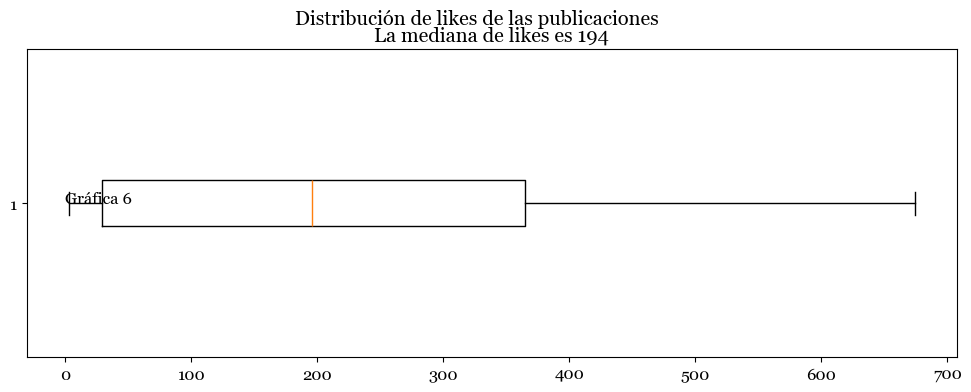

count     72.000000
mean     221.319444
std      191.892710
min        3.000000
25%       29.000000
50%      195.500000
75%      364.750000
max      674.000000
Name: Likes, dtype: float64

In [144]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=0, y=1,
         s='Gráfica 6')
plt.title('La mediana de likes es 194')
plt.suptitle('Distribución de likes de las publicaciones')
plt.boxplot(norteno['Likes'], vert=False)
plt.show()

norteno['Likes'].describe()

## <span style="color:#0F19C9">Distribución de Comentarios</span>

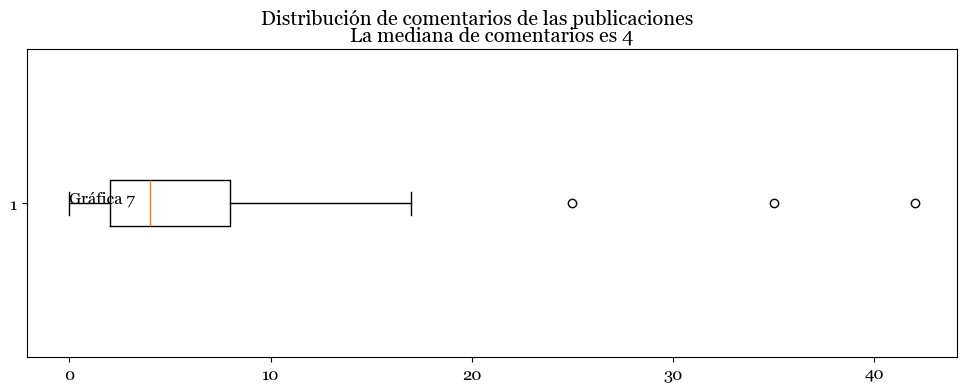

count    72.000000
mean      6.138889
std       7.223408
min       0.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      42.000000
Name: Comentarios, dtype: float64

In [145]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=0, y=1,
         s='Gráfica 7')
plt.title('La mediana de comentarios es 4')
plt.suptitle('Distribución de comentarios de las publicaciones')
plt.boxplot(norteno['Comentarios'], vert=False)
plt.show()

norteno['Comentarios'].describe()

## <span style="color:#0F19C9">Distribución de Palabras del Caption</span>

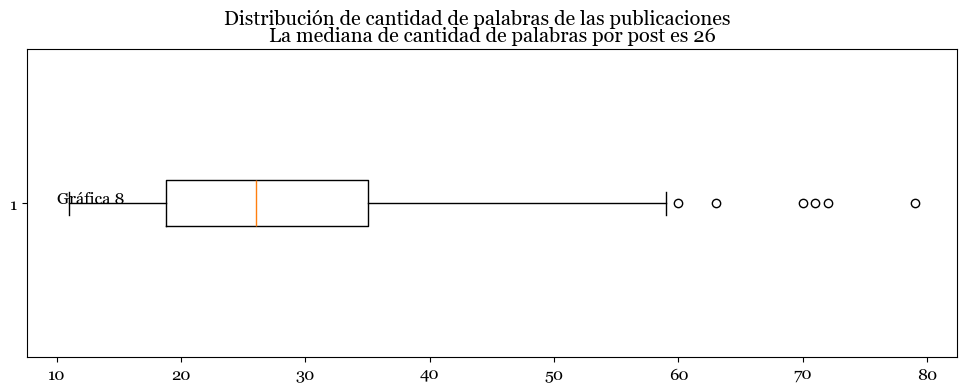

count    72.000000
mean     30.277778
std      16.341619
min      11.000000
25%      18.750000
50%      26.000000
75%      35.000000
max      79.000000
Name: Palabras en Caption, dtype: float64

In [146]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=10, y=1,
         s='Gráfica 8')
plt.title('La mediana de cantidad de palabras por post es 26')
plt.suptitle('Distribución de cantidad de palabras de las publicaciones')
plt.boxplot(norteno['Palabras en Caption'], vert=False)
plt.show()

norteno['Palabras en Caption'].describe()

## <span style="color:#0F19C9">Distribución de Número de Hashtags</span>

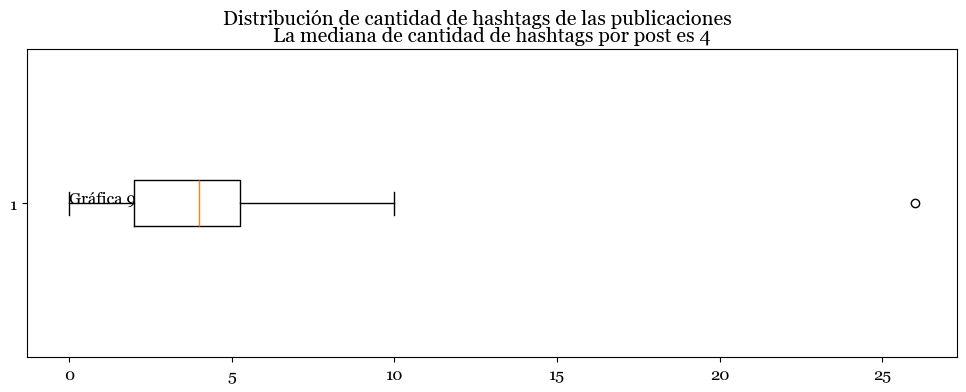

count    72.000000
mean      4.055556
std       3.672850
min       0.000000
25%       2.000000
50%       4.000000
75%       5.250000
max      26.000000
Name: Número de hashtags, dtype: float64

In [147]:
# Graficar la distribución de fechas
plt.figure(figsize=[12, 4])
plt.text(x=0, y=1,
         s='Gráfica 9')
plt.title('La mediana de cantidad de hashtags por post es 4')
plt.suptitle('Distribución de cantidad de hashtags de las publicaciones')
plt.boxplot(norteno['Número de hashtags'], vert=False)
plt.show()

norteno['Número de hashtags'].describe()

## <span style="color:#0F19C9">Distribución de Hashtags</span>

In [148]:
# Limpiar los strings y convertirlos a listas
norteno['Hashtags'] = norteno['Hashtags'].apply(
    lambda x: x.strip("[]").replace("'", "").split(", "))
hashtags_list = [hashtag for sublist in norteno['Hashtags']
                 for hashtag in sublist]
hashtags_list = [hashtag for hashtag in hashtags_list if hashtag]

# Contar la frecuencia de cada hashtag
hashtag_counts = Counter(hashtags_list)
top_hashtags = hashtag_counts.most_common(10)
hashtags, counts = zip(*top_hashtags)

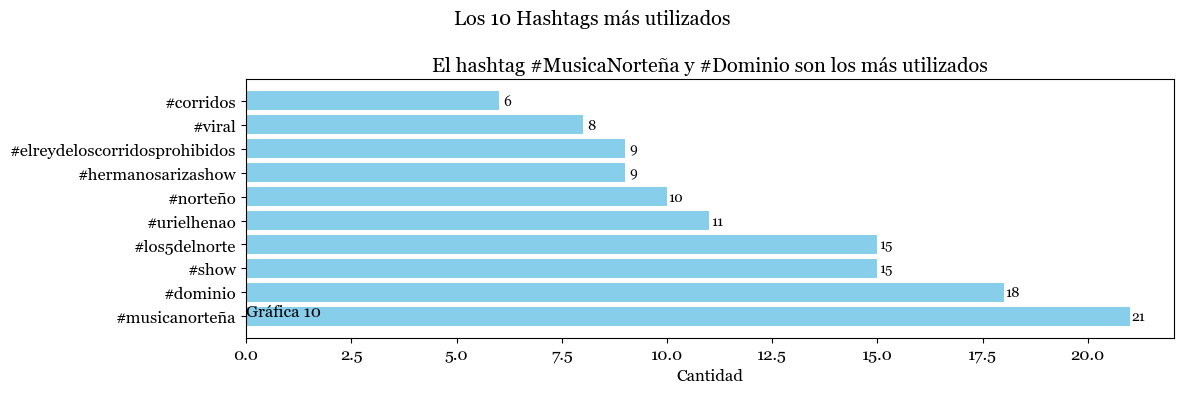

In [150]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=0, y=0,
         s='Gráfica 10')
plt.title('El hashtag #MusicaNorteña y #Dominio son los más utilizados')
plt.suptitle('Los 10 Hashtags más utilizados')
bars = ax.barh(hashtags, counts, color='skyblue')
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width)}',
            va='center',
            ha='center',
            fontsize=10)

ax.set_xlabel('Cantidad')
plt.tight_layout()
plt.show()

Aunque Grupo Dominio no es el artista con la mayor cantidad de publicaciones, si es el artista con mayor cantidad de seguidores, seguido de Uriel Henao. Es claro que su estrategia de contenido en los últimos post ha estado muy enfocada en carruseles, seguido de videos, no se encontró un solo post de foto. En el caso de Uriel Henao, aunque encontramos los tres tipos de contenido, su estrategia está enfocada en videos.

Afortunadamente también encontramos cuentas muy activas en la actualidad, donde la mayoría de las publicaciones que analizaremos se hicieron en el último mes. Ahora, respecto a nuestro KPI del número de likes dividido en el número de seguidores, encontramos una mediana de 0.004565. Esto quiere decir que una publicación de Los Hermanos Ariza Show tiene una mediana de 105.44 likes, de Uriel Henao tiene 230.07 likes, Grupo Dominio tiene 319.99 likes y Los 5 del Norte tiene 73.03 likes; esto para poder mantenerse en la mediana del género. Aunque en general, la mediana de likes por post se encuentra en 194, con 4 comentarios, lo que nos lleva a concluir que no es un público que comenta las publicaciones, no es una métrica valiosa para el análisis.

En términos del Caption, encontramos un intervalo intercuartílico de 19 a 35 palabras con un promedio de 30.50 palabras, incluyendo los hashtags, es decir, captions largos. Y en términos de hashtags, un intervalo de entre 2 y 5.5 hashtags con un promedio de 4.11 hashtags por post de los cuales #MusicaNorteña y #Dominio son los más utilizados con 21 y 18 veces respectivamente.

# <span style="color:#0F19C9">Análisis Multivariable</span>

Ahora, en esta parte del análisis nos concentraremos en encontrar posibles relaciones entre las columnas.

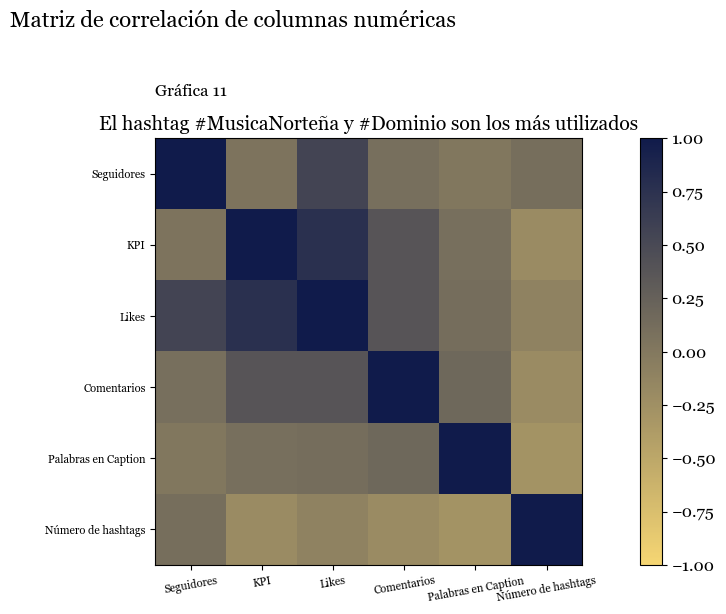

,Seguidores,KPI,Likes,Comentarios,Palabras en Caption,Número de hashtags
Seguidores,1.000000,0.048890,0.548307,0.095080,0.008336,0.103386
KPI,0.048890,1.000000,0.766222,0.381782,0.099832,-0.197007
Likes,0.548307,0.766222,1.000000,0.379830,0.116709,-0.108518
Comentarios,0.095080,0.381782,0.379830,1.000000,0.173634,-0.210523
Palabras en Caption,0.008336,0.099832,0.116709,0.173634,1.000000,-0.281621
Número de hashtags,0.103386,-0.197007,-0.108518,-0.210523,-0.281621,1.000000


In [167]:
# Hacer primero una matriz de correlación
correlation_matrix = norteno.corr(numeric_only=True)

# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(correlation_matrix, cmap=juan_cmap,
                vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=10,
                   fontsize=8)
ax.set_yticklabels(correlation_matrix.columns,
                   fontsize=8)
plt.title('El hashtag #MusicaNorteña y #Dominio son los más utilizados', fontsize=14)
plt.suptitle('Matriz de correlación de columnas numéricas',
             fontsize=16, y=1.02)
plt.text(x=-0.5, y=-1.1, s='Gráfica 11', fontsize=12)
plt.tight_layout()
plt.show()

correlation_matrix

A partir de esa matriz de correlación podemos establecer una relación débil pero negativa del -0.28 entre la cantidad de palabras del caption y el número de hashtags, que no resulta ser tan interesante para nuestro análisis. Luego, encontramos una correlación positiva, pero igual debil del 0.37 entre el número de likes y el número de comentarios, que no es sorpresa, debido a lo que ya habíamos estudiado que las personas no tienen a dejar comentarios en las publicaciones, entonces podríamos continuar de forma efectiva basándonos en los likes. Y finalmente, la correlación más fuerte, es positiva, pero es media de 0.54 entre el número de seguidores y el número de likes, lo que nos garantiza también, que nuestro KPI es el correcto para nuestras evaluaciones.

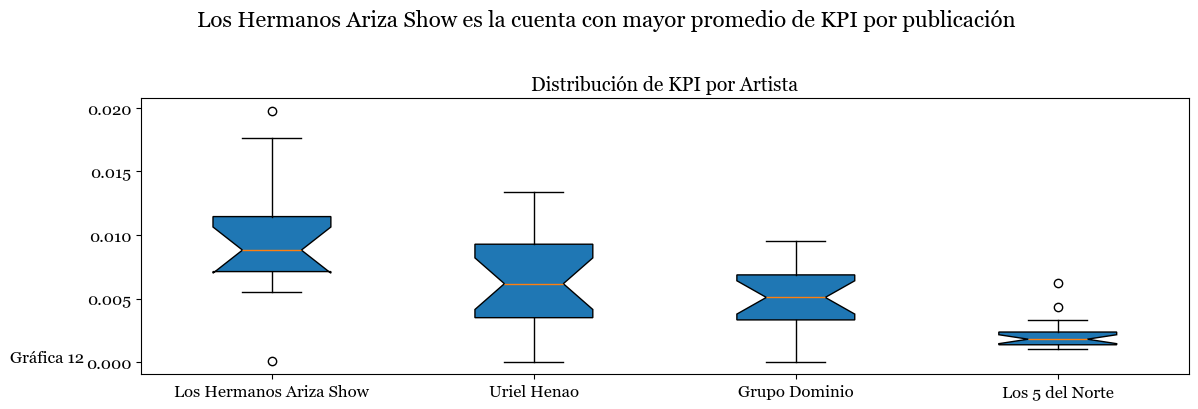

In [216]:
# Agrupar los 'Likes' por 'Artista'
artistas = norteno['Artista'].unique()
likes_por_artista = [norteno[norteno['Artista'] == artista]['KPI'] for artista in artistas]

# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 12', fontsize=12)
plt.title('Distribución de KPI por Artista', fontsize=14)
plt.suptitle('Los Hermanos Ariza Show es la cuenta con mayor promedio de KPI por publicación', fontsize=16, y=1.02)
plt.boxplot(likes_por_artista, labels=artistas, notch=True, patch_artist=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

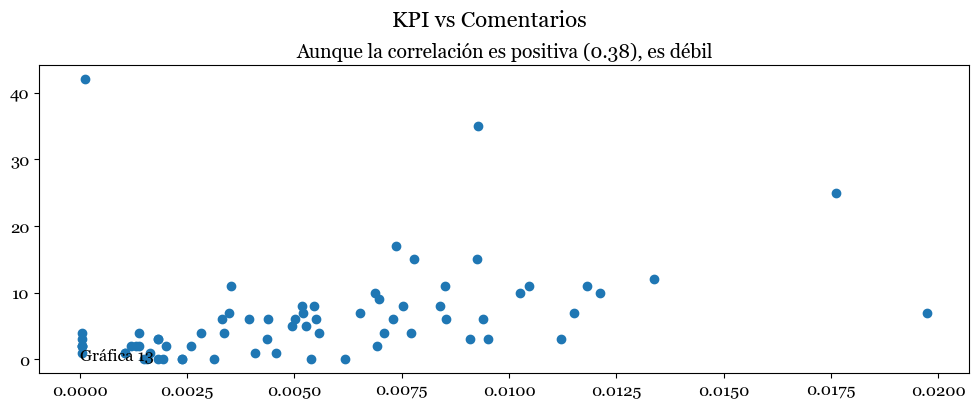

In [181]:
# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 13', fontsize=12)
plt.title('Aunque la correlación es positiva (0.38), es débil', fontsize=14)
plt.suptitle('KPI vs Comentarios', fontsize=16, y=1.02)
plt.scatter(x=norteno['KPI'],
            y=norteno['Comentarios'])
plt.show()

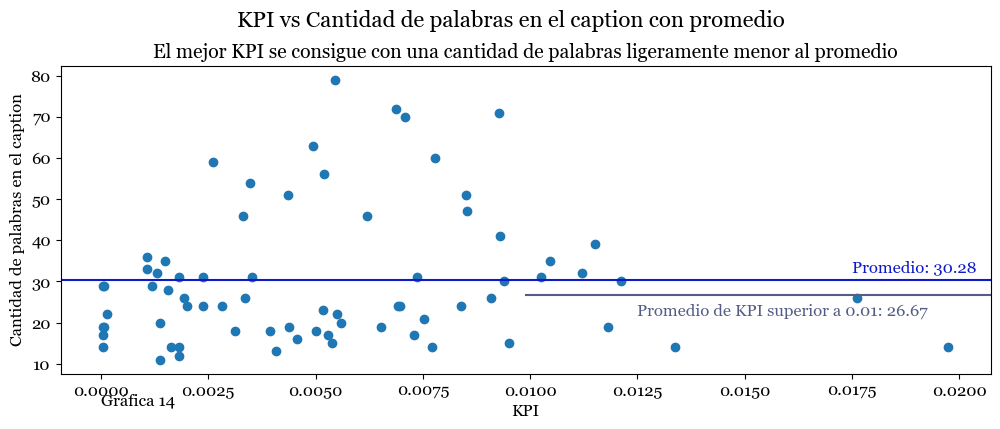

In [234]:
# Mejores KPIS
best_kpi = norteno[norteno['KPI'] >= 0.0100]['Palabras en Caption'].mean()

# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 14', fontsize=12)
plt.title('El mejor KPI se consigue con una cantidad de palabras ligeramente menor al promedio', fontsize=14)
plt.suptitle('KPI vs Cantidad de palabras en el caption con promedio', fontsize=16, y=1.02)
plt.scatter(x=norteno['KPI'],
            y=norteno['Palabras en Caption'])
plt.axhline(y=norteno['Palabras en Caption'].mean(),
            color=juan_colors[4])
plt.text(x=0.0175,
         y=norteno['Palabras en Caption'].mean() + 2,
         s=f"Promedio: {norteno['Palabras en Caption'].mean():.2f}",
         color=juan_colors[4])
plt.axhline(y=best_kpi,
            color=juan_colors[1],
            xmin=0.5,
            xmax=1)
plt.text(x=0.0125,
         y=best_kpi - 5,
         s=f"Promedio de KPI superior a 0.01: {best_kpi:.2f}",
         color=juan_colors[1])
plt.ylabel('Cantidad de palabras en el caption')
plt.xlabel('KPI')
plt.show()

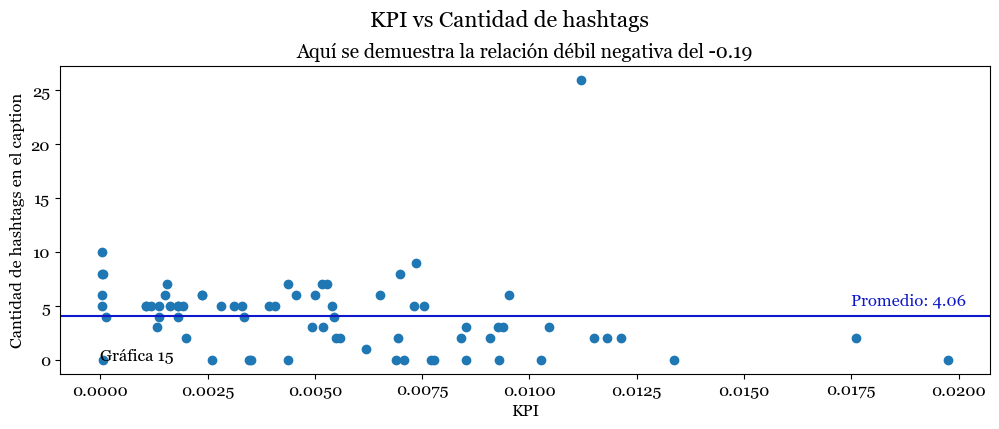

In [243]:
# Mejores KPIS
best_kpi = norteno[norteno['KPI'] >= 0.0100]['Número de hashtags'].mean()

# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 15', fontsize=12)
plt.title('Aquí se demuestra la relación débil negativa del -0.19', fontsize=14)
plt.suptitle('KPI vs Cantidad de hashtags', fontsize=16, y=1.02)
plt.scatter(x=norteno['KPI'],
            y=norteno['Número de hashtags'])
plt.axhline(y=norteno['Número de hashtags'].mean(),
            color=juan_colors[4])
plt.text(x=0.0175,
         y=norteno['Número de hashtags'].mean() + 1,
         s=f"Promedio: {norteno['Número de hashtags'].mean():.2f}",
         color=juan_colors[4])
plt.ylabel('Cantidad de hashtags en el caption')
plt.xlabel('KPI')
plt.show()

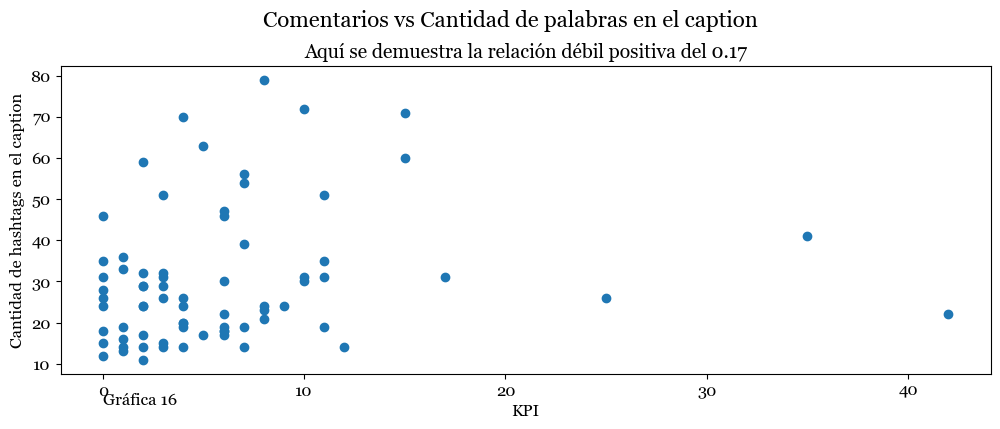

In [267]:
# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 16', fontsize=12)
plt.title('Aquí se demuestra la relación débil positiva del 0.17', fontsize=14)
plt.suptitle('Comentarios vs Cantidad de palabras en el caption', fontsize=16, y=1.02)
plt.scatter(x=norteno['Comentarios'],
            y=norteno['Palabras en Caption'])
plt.ylabel('Cantidad de hashtags en el caption')
plt.xlabel('KPI')
plt.show()

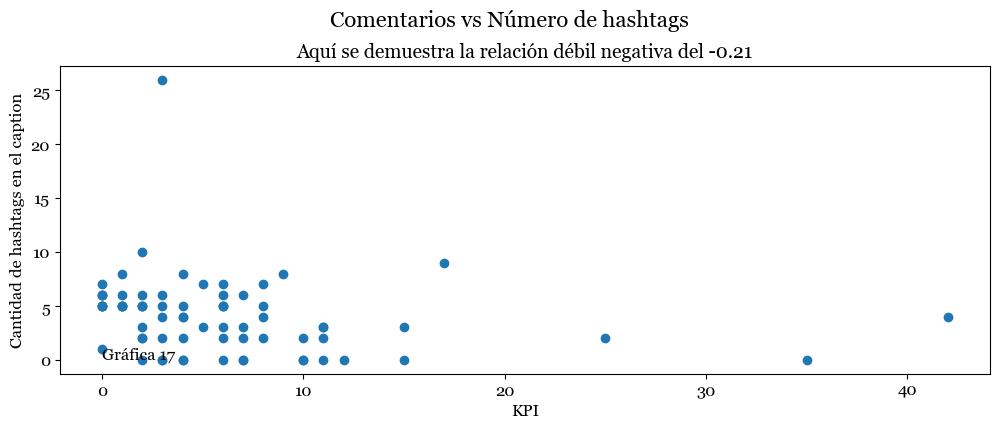

In [268]:
# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 17', fontsize=12)
plt.title('Aquí se demuestra la relación débil negativa del -0.21', fontsize=14)
plt.suptitle('Comentarios vs Número de hashtags', fontsize=16, y=1.02)
plt.scatter(x=norteno['Comentarios'],
            y=norteno['Número de hashtags'])
plt.ylabel('Cantidad de hashtags en el caption')
plt.xlabel('KPI')
plt.show()

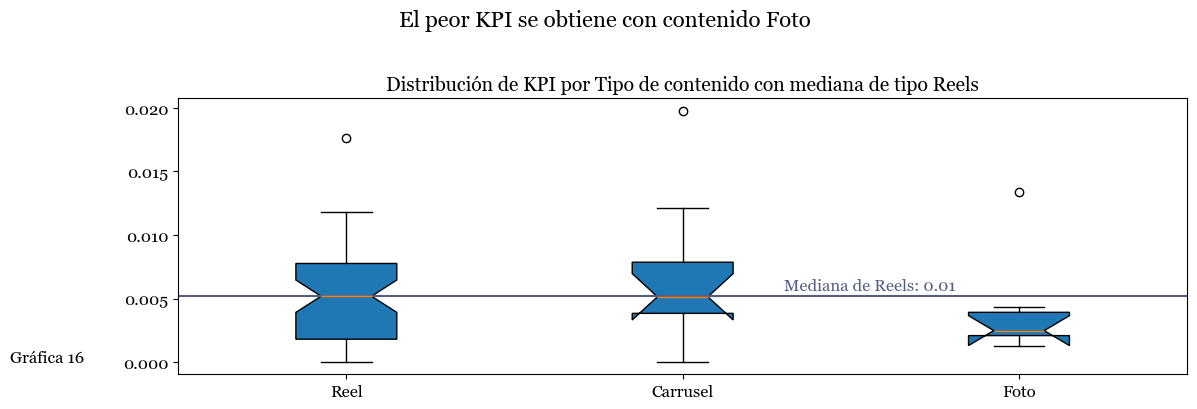

In [264]:
# Listar tipos de contenido y KPIs
tipos_de_contenido = norteno['Tipo'].unique()
KPIs_por_tipo = [norteno[norteno['Tipo'] == tipo]['KPI'] for tipo in tipos_de_contenido]

# Configurar la figura y graficar los boxplots
plt.figure(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 18', fontsize=12)
plt.title('Distribución de KPI por Tipo de contenido con mediana de tipo Reels', fontsize=14)
plt.suptitle('El peor KPI se obtiene con contenido Foto', fontsize=16, y=1.02)
plt.boxplot(KPIs_por_tipo, labels=tipos_de_contenido, notch=True, patch_artist=True)
plt.axhline(y=KPIs_por_tipo[0].median(),
            color=juan_colors[1])
plt.text(x=2.3, y=KPIs_por_tipo[0].median() + 0.0005,
         s=f'Mediana de Reels: {KPIs_por_tipo[0].median():.2f}',
         color=juan_colors[1])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La cuenta de Los Hermanos Ariza Show son la mejor cuenta de Instagram en términos de KPI con una estrategia muy fuerte en reels. También es importante mencionar, que las publicaciones con mejores KPIs también resultan tener un promedio de cantidad de palabras en el caption por debajo del promedio general que es 30.28, los mejores lo tienen en 26.67. Además, es claro que los mejores KPIs también se encontraron, en general, cuando las publicaciones llevan menos hashtags que el promedio que es 4.06.

Tenemos relaciones muy débiles entre los comentarios y tanto para el KPI como para la cantidad de palabras en el caption, lo que nos da a entender que la cantidad de comentarios no depende de ninguna de sus variables, ni de los seguidores, ni de la cantidad de likes, ni de las palabras en el caption, ni el número de hashtags en el caption.

En cuanto al tipo de contenido, es comparable el rendimiento entre Reels y Carruseles, sin embargo, las fotos se ubican muy por debajo de éstos otros dos.

In [270]:
# Crear columnas de día de la semana y de hora del día
norteno['Día de la Semana'] = norteno['Fecha y Hora'].dt.dayofweek
norteno['Hora del día'] = norteno['Fecha y Hora'].dt.hour

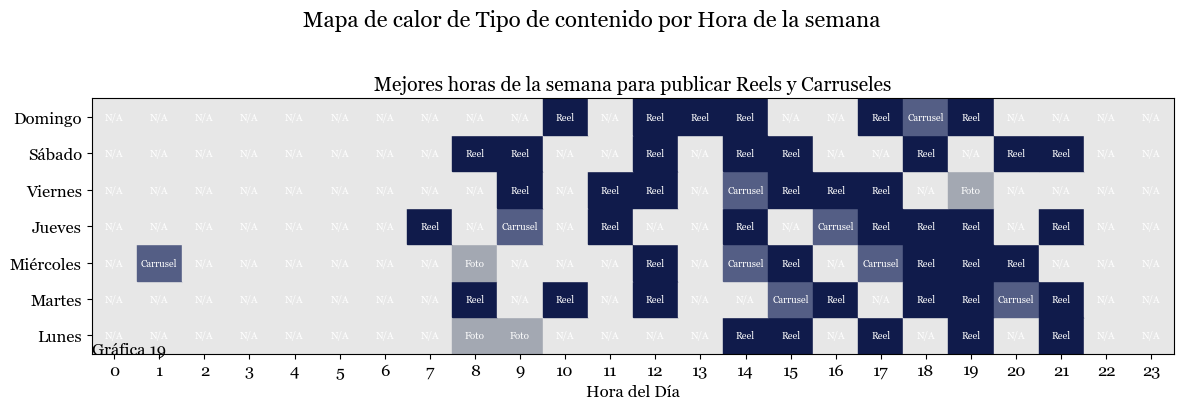

In [319]:
# Hacer matriz del tipo de contenido
heatmap_tipo = norteno.pivot_table(index='Día de la Semana',
                    columns='Hora del día',
                    values='Tipo',
                    aggfunc='max',
                    fill_value='N/A') \
                        .reindex(columns=range(24), fill_value='N/A')

# Graficar el mapa de calor
colors = {'Reel': juan_colors[0], 'Carrusel': juan_colors[1], 'Foto': juan_colors[2]}
fig, ax = plt.subplots(figsize=(12, 4))
for i in range(heatmap_tipo.shape[0]):
    for j in range(heatmap_tipo.shape[1]):
        tipo = heatmap_tipo.iloc[i, j]
        color = colors.get(tipo, juan_colors[3])
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        ax.text(j + 0.5, i + 0.5, str(tipo), ha='center', va='center', fontsize=7, color='white')

plt.text(x=0, y=0, s='Gráfica 19', fontsize=12)
plt.title('Mejores horas de la semana para publicar Reels y Carruseles', fontsize=14)
plt.suptitle('Mapa de calor de Tipo de contenido por Hora de la semana', fontsize=16, y=1.02)
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_tipo.index), 1))
ax.set_xticklabels(range(24))
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_tipo.index))
plt.tight_layout()
plt.show()

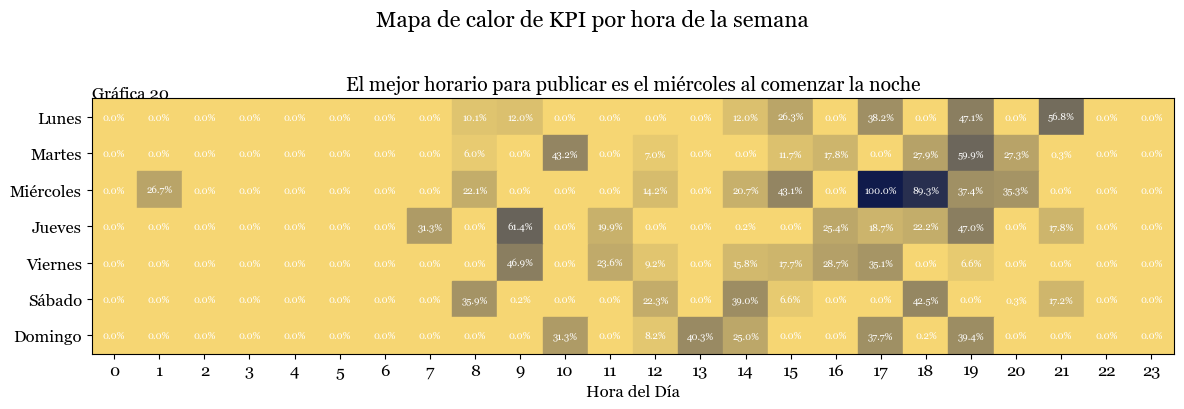

In [328]:
# Hacer matriz del tipo de contenido
heatmap_kpi = norteno.pivot_table(index='Día de la Semana',
                    columns='Hora del día',
                    values='KPI',
                    aggfunc='mean',
                    fill_value=0) \
                        .reindex(columns=range(24), fill_value=0)
                        
# Normalizar los valores de KPI a porcentajes
heatmap_kpi = (heatmap_kpi / heatmap_kpi.max().max()) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=0, y=0, s='Gráfica 20', fontsize=12)
plt.title('El mejor horario para publicar es el miércoles al comenzar la noche', fontsize=14)
plt.suptitle('Mapa de calor de KPI por hora de la semana', fontsize=16, y=1.02)
cmap = juan_cmap

# Iterar sobre cada celda de la tabla pivote para aplicar colores y mostrar valores
for i in range(heatmap_kpi.shape[0]):  # Filas (Días de la Semana)
    for j in range(heatmap_kpi.shape[1]):  # Columnas (Horas del Día)
        kpi_value = heatmap_kpi.iloc[i, j]
        
        # Normalizar el valor para asignar un color
        norm_value = kpi_value / heatmap_kpi.values.max()  # Normalización
        color = cmap(norm_value)  # Obtener el color del colormap

        # Dibujar el rectángulo con el color
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        
        # Escribir el valor de KPI en el centro del cuadro
        ax.text(j + 0.5, i + 0.5, f"{kpi_value:.1f}%", ha='center', va='center', fontsize=7, color='white')

# Configurar los ejes
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_kpi.index), 1))
ax.set_xticklabels(range(24), rotation=0)
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_kpi.index))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A partir de estos dos mapas de calor, podemos concluir los mejores horarios para publicar basados en los KPIs y en el tipo de contenido que se va a publicar. Sin embargo, nos hace falta comparar esta información con las otras cuentas de referencias de los otros géneros para terminar de confirmar nuestras hipótesis.

# <span style="color:#0F19C9">Conclusiones</span>

Nuestro análisis puede concluir con total confianza que:
- Hola 1